### The Brain
Since we are studying machine and deep learning as a part of artificial intelligence, we need to understand the building block of real intelligence

<img src="brain.png" width=50% height=50%/>

Following are some properties of the brain
* It is a wonderful pattern matching machine
* The fundamental unit of the brain is a neuron
* Different functions are separated into different regions in the brain
* The brain is extremely plastic

So why are we studying it
* Pattern matching is essential to understand historical trends in data to predict the future
* Compute is expensive, we cannot run computers continuously, so knowing when to fire is essential. Fun Fact: A typical laptop uses 65-85w of electricity, guess how much our brain uses?
* We specialize machine learning tasks, as models, each model spcializes as a single function
* Ok, here we have no solution, the closest one we have is transfer learning

### The Neuron
**The Neuron is the fundamental unit**

**Function**
- Electrical signals pass through the neuron
- Chemical transmitters are between neurons
- The electrical signal is only generated when the neuron senses a feature which it is specialized in
- This function is called as action potential, where the electric voltage is generated only when a treshold is crossed

<img src="neuron.jpg" width=50% height=50%/>

#### Let us understand how the brain decodes a visual signal from the eye
This is how we were inspired to build a neuron in neural networks

<img src="visual_cortex.png" />

This region of the brain is called the **Visual Cortex**
It is divided in 6 regions
* V1 Area
    - Gets input signal directly from the eye, each patch(think pixel) from the eye is mapped invertedly to this area
    - Function: Edge Dectection
* V2 Area
    - Gets input from V1
    - Function: Orientation, Colour and Spatial Frequency
* V3 Area
    - Gets input from V2
    - Function: Detect Gross Motion
* V4 Area
    - Gets input from V2 as well as V1
    - Function: Like V2 it focuses on Colour and Orientation, but has attention to simple geometric shapes
* V5 Area
    - Gets input from V2
    - Function: Tuned for motion bet specializes in Speed and Direction
* V6 Area
    - Gets input from V5 and V1
    - Tracks movement of self

<img src="single_neuron_function.svg" width=50% height=50% />

**An artificial neuron is a matchematical function that gets activated on the right input producing some output**

**On the sucess of the function a potential is generated for an output, just like the brain neuron**

<img src="ann01.png" width=50% height=50% />

### Bias

**Consider a function with f(x1,x2) = x1 + x2**

x1 and x2 are inputs and this function returns an output.
**Now consider if the output is greater than 30 then it pushes the output
else
there is no output
**

**30 can be called as the Threshold**

This can be represented as 

x1 + x2 > 30 #then fire

x1 + x2 < 30 #don't fire

Which can also be written as 
x1 + x2 - Threshold > 0

x1 + x2 - Threshold < 0

**The -Threshold term is called Bias**

<img src="ann02.png" width=50% height=50% />

### Weights
All things are not given the same weight, imagine you are deciding where to eat
The factors which affect the decision are

a. What is the preference of your friend
b. What are some of the new places in the city?
c. What is the nearest one, where you can reach without much hassle?

You can give the following importance to the points
a. 50%
b. 30%
c. 20%


The entire output can be represented as a math equation which is 


$$y = \left( \sum_{i=1}^n w_i x_i \right) + bias$$

More realistically, if both the weights, bias and inputs are matrices then it is written as

$$y = w^T x + bias$$


### Activation Function
Consider that your dataset follows a function
y = f(x) = 4x + 3

Then some of the values could look like

| x | y |
| :-: | :-: |
| 1 | 7 |
| 2 | 11 |
| 3 | 15 |
| 4 | 19 |
| 5 | 23 |
| 6 | 27 |
| 7 | 31 |
| 8 | 35 |
| 9 | 37 |
| 10 | 43 |

If you plot the values

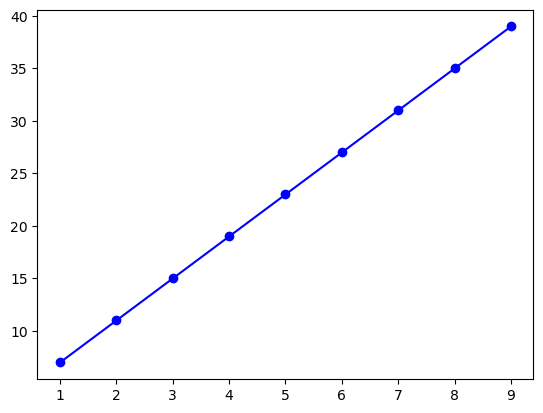

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.arange(1,10,1)
def f(x):
    return 4*x + 3

y = f(x)
plt.plot(x,y,'-bo')

So as you see the equation for a line is of the for **y = mx + c**

Let us take another example

#### Say you are a Loan Officer and are responsible for approving of loan based on 2 conditions
* Income
* Debt
Your Equation might look like 

solvency = (weight for income x income) + (weight for debt x debt)

#### Outcome
**You want to build a model of the line equation form, how do you do it?**


You dont know what the equation is for approval, so you do the following
* You look for existing data where decisions have been taken
* You look for the conditions on which approval was done(essentially threshold)

Does this remind you of the above equation
$$y = \left( \sum_{i=1}^n w_i x_i \right) + bias$$

So consider the dataset you have as below

| CustomerId | Income | Debt | Approved |
| :-- | --: | --: | :--: |
| 30 | 50000 | 5000 | Yes |
| 110 | 60000 | 20000 | Yes |
| 80 | 35000 | 15000 | No |
| 30 | 40000 | 20000 | No |
| 30 | 50000 | 10000 | Yes |
| 30 | 85000 | 20000 | Yes |

Consider the weight for debt is 0.8 and for income is 0.2

With this if we take each row and plot it against(Yes-1 and No-0) vs the weighted sum, the plot looks as below

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
df = pd.read_csv('loan.csv')
w_debt = 0.6
w_income = 0.4
df["weighted_sum"] = w_income*df['Income'] + w_debt*df['Debt']
df['Approved_Binary'] = np.where(df['Approved'] == "Yes", 1, 0)
df

,CustomerId,Income,Debt,Approved,weighted_sum,Approved_Binary
0,30,50000,5000,No,23000.0,0
1,110,60000,20000,Yes,36000.0,1
2,80,35000,15000,No,23000.0,0
3,30,40000,20000,No,28000.0,0
4,30,50000,10000,Yes,26000.0,1
5,30,85000,20000,Yes,46000.0,1


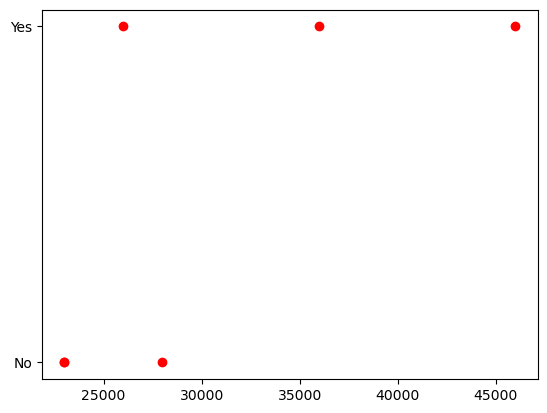

In [23]:
plt.plot(df['weighted_sum'],df['Approved'],'ro')

**Ok so lets add a bias based on the plot, let us say the threshold is 
> greater than 30000 then approve else reject

i.e 

$$w_1 x_1 + w_2 x_2 + (-30000) > 0 => Approve  

    w_1 x_1 + w_2 x_2 + (-30000) <= 0 => Reject$$


**So what you see is a linear line and association**
**Let us see another example of this consider an AND, OR, NOT truth tables**
<img src="and.png" width=40% height=40% />
<img src="or.png" width=40% height=40% />
<img src="not.png" width=40% height=40% />


If we consider the equation as describe above
**x1 + x2 > bias or x1 + x2 < bias**
Here x1 is 1 and x2 can be 0

#### A very clear linear separation can be seen, hence the neuron just needs to learn the linear equation of 
#### x1+ x2 >< bias


**But what if we look at the XOR function**
<img src="xor.png" width=40% height=40% />

There is no discernable way to draw a line, the only way is to draw a curve
A curve which separates values. 

Does a curve represent a straight line equation, well no

**So how does the neuron learn a curve function**

### Sigmoid Function
A classic approach on 

### Cost Function, Loss Function, Error Function

### Gradient Based Descent Optimization

### Learning Algorithms(Goodfellow-Pg.96)

### Linear Regression(Goodfellow-Pg.104)